In [1]:
from simulated_data_generator import SimulatedDataGenerator
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
number_of_variables = 256
number_of_samples = 1024
correlation_proportions = [0.25, 0.25, 0.5]
correlation_edges = np.cumsum(correlation_proportions) * number_of_variables

In [3]:
generator = SimulatedDataGenerator(number_of_variables,
                                   positive_correlated=correlation_proportions[0],
                                   negative_correlated=correlation_proportions[1],
                                   uncorrelated=correlation_proportions[2])

x, missing_flag, y = generator.generate_data_logistic(number_of_samples)

In [5]:
correlation_values = np.zeros(number_of_variables)
for variable_idx in range(number_of_variables):
    feature_vector = x[:, variable_idx]
    correlation_value, _ = pearsonr(feature_vector, y)
    correlation_values[variable_idx] = correlation_value

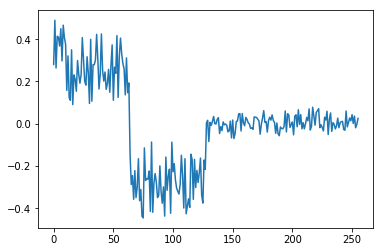

In [6]:
plt.figure()
plt.plot(np.arange(number_of_variables), correlation_values)
plt.show()

In [7]:
minimum_values = [0.0, 0.1, 0.2, 0.5, 1.0, 5.0]
maximum_values = [0.2, 0.5, 1.0, 1.0, 2.0, 10.0]

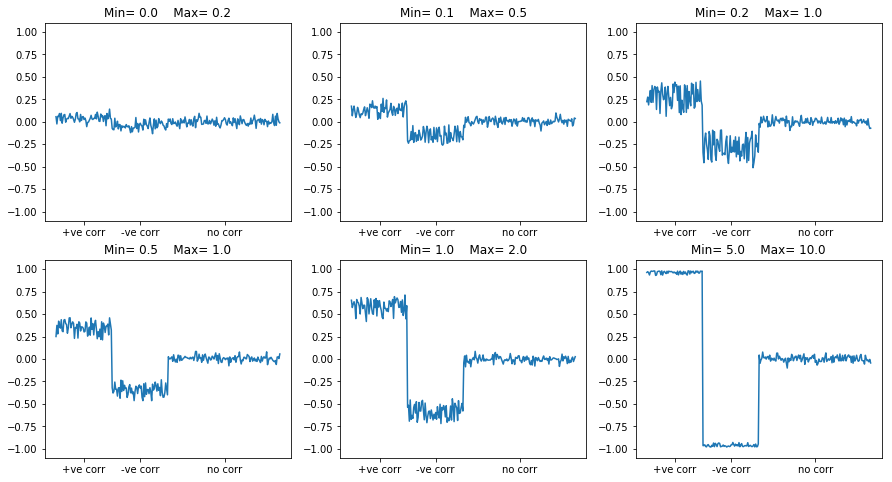

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for min_value, max_value, ax in zip(minimum_values, maximum_values, axs.flatten()):
    generator = SimulatedDataGenerator(number_of_variables,
                                   positive_correlated=correlation_proportions[0],
                                   negative_correlated=correlation_proportions[1],
                                   uncorrelated=correlation_proportions[2])

    x, missing_flag, y = generator.generate_data_logistic(number_of_samples, min_mult=min_value, max_mult=max_value)
    correlation_values = np.zeros(number_of_variables)
    for variable_idx in range(number_of_variables):
        feature_vector = x[:, variable_idx]
        correlation_value, _ = pearsonr(feature_vector, y)
        correlation_values[variable_idx] = correlation_value
    ax.plot(np.arange(number_of_variables), correlation_values)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xticks([32, 96, 192])
    ax.set_xticklabels(['+ve corr', '-ve corr', 'no corr'])
    
    ax.set_title('Min= {}    Max= {}'.format(min_value, max_value))
plt.show()

In [23]:
x, missing_flag, y = generator.generate_data_linear(number_of_samples, data_range=[0,0.1])

In [24]:
correlation_values = np.zeros(number_of_variables)
for variable_idx in range(number_of_variables):
    feature_vector = x[:, variable_idx]
    correlation_value, _ = pearsonr(feature_vector, y)
    correlation_values[variable_idx] = correlation_value

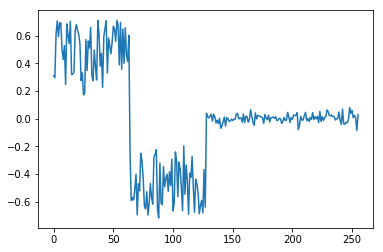

In [25]:
plt.figure()
plt.plot(np.arange(number_of_variables), correlation_values)
plt.show()

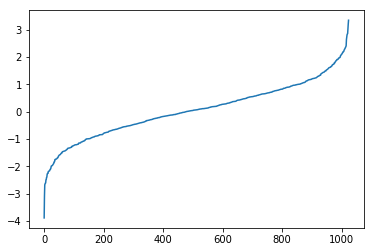

In [26]:
plt.figure()
y.sort()
plt.plot(y)
plt.show()

array([79.04722087, 17.62876182, 85.93929289, ..., 91.58178099,
       35.01338557, 15.02076064])